In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer


import datetime
datetime.datetime.strptime

import preprocessor as p
import re

In [2]:
data = pd.read_csv('data/russia_201901_1_tweets_csv_hashed.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
data = data[['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_text', 'tweet_time', 'is_retweet']]

In [22]:
data.head(2)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language,tweet_text,tweet_time,is_retweet
0,507097592116035584,TfAIZXAy2WKyIaMRGRo5Bc7TvYn5jid4HDIhZjHGuL0=,TfAIZXAy2WKyIaMRGRo5Bc7TvYn5jid4HDIhZjHGuL0=,TfAIZXAy2WKyIaMRGRo5Bc7TvYn5jid4HDIhZjHGuL0=,"New York, USA",Just another day on the job.,NaN,101,137,2013-08-26,tr,Follow your dreams.,2014-09-03 09:27:00,False
1,634855237140873217,aX+o4MEU0jsv3nWf6rkY9XdnJo+lUKxMZ3dB4rKPeIg=,aX+o4MEU0jsv3nWf6rkY9XdnJo+lUKxMZ3dB4rKPeIg=,aX+o4MEU0jsv3nWf6rkY9XdnJo+lUKxMZ3dB4rKPeIg=,"New York, USA",3 years ... Hardcore twitter fanatic #My stor...,NaN,56,94,2015-03-12,en,Ashley Madison stats find New Orleans among th...,2015-08-21 22:30:00,False


In [23]:
max(data.tweet_time)

Timestamp('2018-11-06 18:04:00')

### Subsetting by prime interest time when seen most of posting activity

### What is going on in 2015??


In [18]:
data['tweet_time'] = pd.to_datetime(data['tweet_time'])
start_date2015 = '2015-06-01'
end_date2015 = '2016-01-01'

mask2015 = (data['tweet_time'] > start_date2015) & (data['tweet_time'] <= end_date2015)

data_2015 = data.loc[mask2015]

In [19]:
tweets_mask2015 = data_2015['is_retweet'] == False
tweets2015 = data_2015[tweets_mask2015]
tweets_english2015 = tweets2015[ tweets2015['account_language'] == 'en']

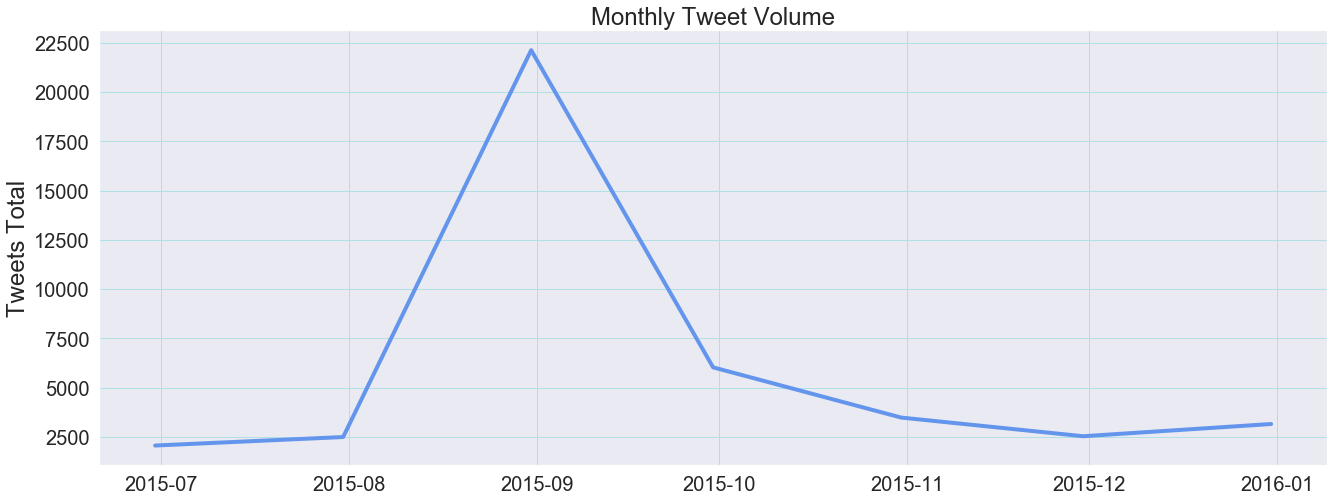

<Figure size 432x288 with 0 Axes>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Number of Tweets Over Time
df_time2015 = pd.DataFrame(pd.to_datetime( tweets_english2015["tweet_time"] ))

df_time2015["count"] = 1
df_time2015.set_index("tweet_time", inplace = True)

# monthly
monthly2015 = df_time2015['count'].resample('M').sum()



plt.figure(figsize=(22,8))

plt.plot(monthly2015,  c = 'cornflowerblue', linewidth=4.0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Tweets Total', fontsize = 24)
plt.title('Monthly Tweet Volume', fontsize = 24)
plt.grid(c = 'powderblue')

plt.show()

plt.savefig('plots/monthly_tweet_volume2015.png')

* Trump announced his candidacy on June 16, 2015
* On August 6, 2015, the first Republican primary debate took place on Fox News.
* This turbulent election season has fanned the flames of racism, xenophobia, homophobia, sexism and bigotry. 
* Topless women of Times Square test New York's liberal take on nudity. De Blasio has shown an unexpectedly prudish streak by declaring one solution might be to tear up Times Square's plaza
* June 18th, Charlston Shootings
* August 27th, On-Air Virigina shooting
* Sept 18th, 2018:  Lori Hendry’s faslse accusational tweet about Schumer raping a 16 year old was retweeted 15,000 times and liked 23,000 times. It then migrated to Facebook, where it was shared thousands of times as a meme.



In [9]:
tweets2015['tweet_text'].sample(10)

697363    Lawsuits against Ashley Madison over hack face...
528407    #Benghazi #HillaryLiesMatter #HillaryClintonfo...
441797    17 State of Michigan employee e-mail addresses...
758484    Undertaker Gets Revenge On Brock Lesnar with C...
304063    Casino Bus Crashes Into Queens Apartment Building
41031     @triplegranddad @tasteofaz send this too @FoxN...
8276      Tiger Woods to Play in 2015 Wyndham Championsh...
35736     #StopIslamicTerror #StopIslamicTerror #StopIsl...
287630    #Trump2016 #DonaldTrump4president #GO TRUMP GO...
187866    #ObamaIsAMoron #obamaistheworstpresidentever #...
Name: tweet_text, dtype: object

In [10]:
len(tweets2015['tweet_text'].unique())

24787

In [11]:
print(tweets2015['tweet_text'].unique()[20990:21000])


['BUT: He is not lonely #BUT #butthis #bestUSAtoday #Atlantic #ISIS #Palmyra #artifact #MiddleEast  https://t.co/FL2vyk5LGj'
 "BUT: WHY I'M THANKFUL FOR #DACA AND READY FOR @HillaryClinton \nhttps://t.co/TAh4O8C6YC https://t.co/QsPbPlORpy"
 'LaGuardia Airport getting a facelift'
 'F1 News: F1 community adds its tributes to Justin Wilson'
 "@toby_wicks_97 \nYou didn't kill me, you just made me mad 😡"
 '#BUT - #DickCheney: America Losing #Military Technical Edge http://t.co/odrNkO80Pg http://t.co/SMEmMsmV47'
 "BUT - Report: $1.3M Spent on Hotels in #Ethiopia for #Obama's Two-Day Stay http://t.co/KSALogi2dz"
 'BUT:Judicial Watch Sues @ObamaAdministration for Records about #Citizenship Push https://t.co/5YQZOoMW88'
 'BUT: Now it became something to be proud for #BUT #butthis #bestUSAtoday #LGBT #transgender #WhiteHouse  https://t.co/B5sByThV9k'
 'BUT : Any help is already help \n\n#refugeeswelcome #Loudoun #SyrianRefugees  https://t.co/AYSmBi1x0K']


### End of 2015

### WHAT WAS GOING ON in SEPTEMBER 2018? AND ALSO CURIOUS ABOUT SCHUMER

In [103]:
data['tweet_time'] = pd.to_datetime(data['tweet_time'])
start_date_sep2018 = '2018-09-01'
end_date_oct2018 = '2018-10-15'

mask_sep2018 = (data['tweet_time'] > start_date_sep2018) & (data['tweet_time'] <= end_date_oct2018)

data_sep_2018 = data.loc[mask_sep2018]

In [104]:
tweets_mask_sep2018 = data_sep_2018['is_retweet'] == False
tweets_sep2018 = data_sep_2018[tweets_mask_sep2018]
tweets_english_sep2018 = tweets_sep2018[ tweets_sep2018['account_language'] == 'en']

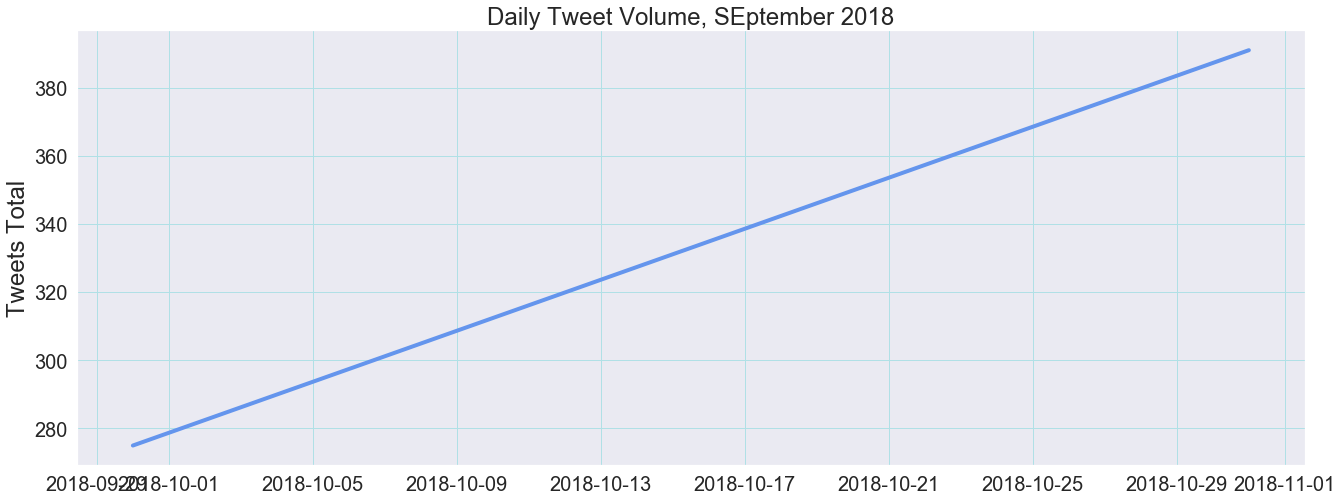

<Figure size 432x288 with 0 Axes>

In [107]:
# Number of Tweets Over Time
df_time_sep2018 = pd.DataFrame(pd.to_datetime( tweets_english_sep2018["tweet_time"] ))

df_time_sep2018["count"] = 1
df_time_sep2018.set_index("tweet_time", inplace = True)

# monthly
daily_sep2018 = df_time_sep2018['count'].resample('D').sum()


plt.figure(figsize=(22,8))

plt.plot(monthly_sep2018,  c = 'cornflowerblue', linewidth=4.0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Tweets Total', fontsize = 24)
plt.title('Daily Tweet Volume, SEptember 2018', fontsize = 24)
plt.grid(c = 'powderblue')

plt.show()

plt.savefig('plots/daily_tweet_volume_sep2018.png')

In [121]:
print(tweets_english_sep2018['tweet_text'].unique()[600:])

["@thehill 1. Kanye West is mentally unstable\n2. Kanye West doesn't care about Black ppl.\n3. Kanye west does NOT represent Black ppl.\n4. Kanye west represents Kanye west!"
 "@Newsweek Republicans thought they would have it easy confirming a Trump appointee... y'all have no idea how much the power of the people is stronger!\nWe shall keep resisting till we VOTE y'all out!"
 "@CraigCaplan @PressSec @senatemajldr Republicans can tap each other on the back for confirming a sexual assaulter.\nY'all just showing how much of a joke our judiciary system has become under Trump."
 '@NBCNews Trying to get my head around how we cam from Obama and wise and capable people discussing how to make this country a better place, to dumb Trump and mentally unstable Kanye talking bs in the oval office!'
 'So much beauty in one picture.\nLove for natural hair /Afro is everything.'
 '@thehill Rips?\nNot even close!\nTrump is just making a fool outta himself with every single word he utters!'
 '@OlivePlaid 

In [24]:
data['tweet_time'] = pd.to_datetime(data['tweet_time'])
start_date = '2014-01-01'
end_date = '2018-11-06'

mask = (data['tweet_time'] > start_date) & (data['tweet_time'] <= end_date)

data_prime = data.loc[mask]

In [25]:
type(data_prime)

pandas.core.frame.DataFrame

In [26]:
min(data_prime.tweet_time)

Timestamp('2014-01-04 00:44:00')

Take a quick look at some tweets.

How many tweets total?

In [27]:
len(data)

765246

In [28]:
### Retweets
retweets_mask = data_prime['is_retweet'] == True
retweets = data_prime[retweets_mask]

### Tweets
tweets_mask = data_prime['is_retweet'] == False
tweets = data_prime[tweets_mask]

#English Only
tweets_english = tweets[ tweets['account_language'] == 'en']
retweets_english = retweets[ retweets['account_language'] == 'en']



# For tests if needed

# toy_retweets_text = retweets['tweet_text'][:100 ]
# toy_retweets_df = retweets[:100]
# toy_tweets_df = tweets[:100]
# toy_tweets_text = tweets['tweet_text'][:100]

In [29]:
len(tweets_english.userid.unique())

331

In [30]:
min(tweets_english.tweet_time)

Timestamp('2014-01-04 00:44:00')

In [31]:
print( "english tweets:\t\t", len(tweets_english) )
print( "english retweets:\t", len(retweets_english) )

english tweets:		 159272
english retweets:	 591827


### Tweets Frequencies Timeseries. Monthly

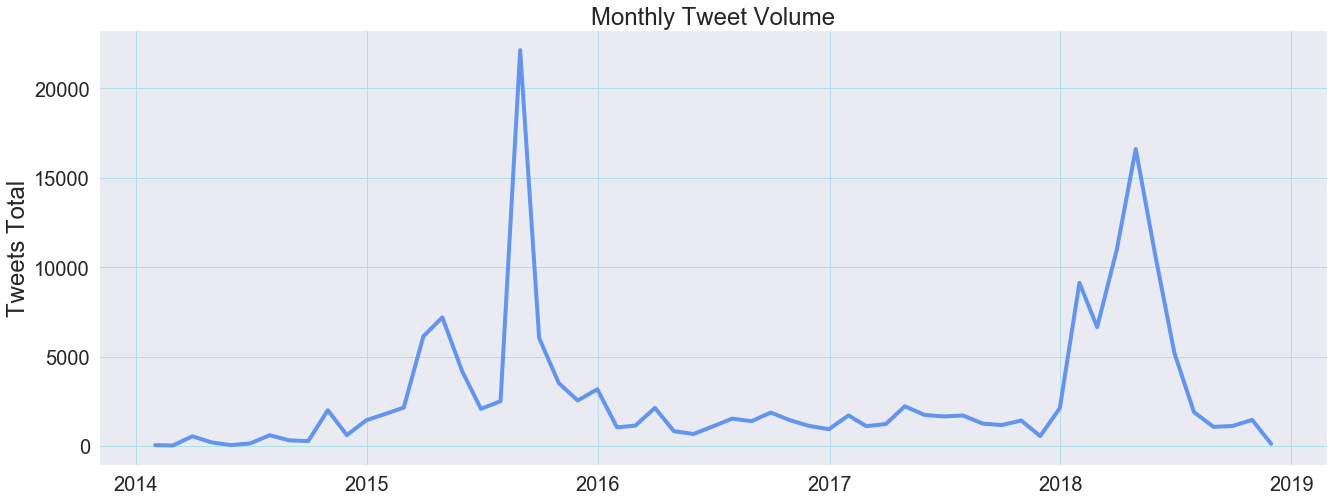

<Figure size 432x288 with 0 Axes>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Number of Tweets Over Time
df_time = pd.DataFrame(pd.to_datetime( tweets["tweet_time"] ))

df_time["count"] = 1
df_time.set_index("tweet_time", inplace = True)

# hourly
hourly = df_time['count'].resample('H').sum()

# daily
daily = df_time.resample('D').sum()

# monthly
monthly = df_time['count'].resample('M').sum()



plt.figure(figsize=(22,8))

plt.plot(monthly,  c = 'cornflowerblue', linewidth=4.0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Tweets Total', fontsize = 24)
plt.title('Monthly Tweet Volume', fontsize = 24)
plt.grid(c = 'powderblue')

plt.show()

plt.savefig('plots/monthly_tweet_volume.png')

In [33]:
em_data = pd.read_csv('data/andbrainDataSet108.csv')

In [34]:
# clean up the word column
em_data["word"] = em_data.word.str.strip().str.lower()

# remove duplicates
em_data = em_data.groupby('word').mean()

In [35]:
em_data.sample(3)

,disgust,surprise,neutral,anger,sad,happy,fear
word,,,,,,,
endures,0.023810,0.023810,0.023810,0.071429,0.071429,0.023810,0.023810
unplug,0.035714,0.107143,0.035714,0.035714,0.035714,0.035714,0.035714
grudges,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.107143


### Reading emotions set. Quickly preprocessing

In [36]:
em_data.head(5)

,disgust,surprise,neutral,anger,sad,happy,fear
word,,,,,,,
a,0.000004,0.000004,0.001425,0.000004,0.000004,0.000004,0.000004
aa,0.035714,0.035714,0.035714,0.107143,0.035714,0.035714,0.035714
aardvarkartglass,0.035714,0.107143,0.035714,0.035714,0.035714,0.035714,0.035714
aaron,0.017857,0.089286,0.017857,0.053571,0.017857,0.017857,0.017857
ab,0.011905,0.083333,0.011905,0.059524,0.011905,0.011905,0.011905


In [37]:
len(em_data)

23634

### Quick preprocessing of text in tweets

In [38]:
# def preprocessing_text(text):
#     '''
#     INPUT: str
#     OUTPUT: str w/ emojies, urls, hashtags and mentions removed
#     '''
#     p.set_options(p.OPT.EMOJI, p.OPT.URL, p.OPT.HASHTAG, p.OPT.MENTION, p.OPT.NUMBER)
#     clean_text = p.clean(text)
    
#     return clean_text

def remove_symbols(word, symbol_set):
    
    '''
    Removing symbols from word
    '''
    return ''.join(char for char in word 
                    if char not in symbol_set)


In [39]:
string.punctuation

punct = set(string.punctuation)
punct.remove('@')
punct.remove('#')
punct.add('🇺🇸')
punct.add('🤢')

lemmer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

tweets_english['tweet_text'] = tweets_english['tweet_text'].apply(lambda x: x.lower())
tweets_english['tweet_text'] = tweets_english['tweet_text'].apply(lambda x: remove_symbols(x, punct))
tweets_english['tweet_text'] = tweets_english['tweet_text'].apply(lambda x: re.sub(r'https?:\/\/.*\/\w*', '', x))
tweets_english['tweet_text'] = tweets_english['tweet_text'].apply(lambda x: lemmer.lemmatize(x))
tweets_english['tweet_text'] = tweets_english['tweet_text'].apply(lambda x: stemmer.stem(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

Take a quick look at the cleaned up tweets.

In [40]:
tweets_english.tweet_text.sample(3)

749778    @pennydreadful81 @absolutebeautxo httpstcournx...
360485    @lisatheinfidel @cairnewyork @barenakedislam i...
153987    #donaldtrump #donaldtrumpforpresident #makeame...
Name: tweet_text, dtype: object

### Vectorizing tweets corpus over the set of words from em_dataset

In [41]:
# vocab = em_data.word.unique()

Here's our vocab.

In [42]:
# vocab[0:10]

In [43]:
# # making a vocabulary for vectorizer
# vocabulary= sorted(set(em_data.word))

In [44]:
# vocabulary[0:10]

In [45]:
# #Sklearn requires it to be a dictionary
# voc_dict = dict.fromkeys(vocabulary, 0)



In [46]:
vectorizer = CountVectorizer(stop_words='english', vocabulary = em_data.index)
vectorizer.fit(tweets_english.tweet_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None,
        vocabulary=Index(['a', 'aa', 'aardvarkartglass', 'aaron', 'ab', 'aback', 'abagail',
       'abah', 'abandon', 'abandoned',
       ...
       'zoned', 'zones', 'zoning', 'zoo', 'zoom', 'zoomed', 'zooming',
       'zoophiliac', 'zoos', 'zouk'],
      dtype='object', name='word', length=23634))

In [47]:
X = vectorizer.transform(tweets_english.tweet_text)

In [48]:
X

<159272x23634 sparse matrix of type '<class 'numpy.int64'>'
	with 424393 stored elements in Compressed Sparse Row format>

In [49]:
X

<159272x23634 sparse matrix of type '<class 'numpy.int64'>'
	with 424393 stored elements in Compressed Sparse Row format>

In [50]:
# features are the words from em_set, and in this case our vocabulary
features = vectorizer.get_feature_names()
features[0:10]

['a',
 'aa',
 'aardvarkartglass',
 'aaron',
 'ab',
 'aback',
 'abagail',
 'abah',
 'abandon',
 'abandoned']

In [51]:

# # features are the words from em_set, and in this case our vocabulary
# features = vectorizer.get_feature_names()

# what problem I am solving
# What question are you answering
# What is you data?
# What's in your data
# What's is your approach to answering your questions?


# dense_x = X.toarray()

# # Making Pandas DataFrame w/vectorized words data and vocabulary as columns
# count_vectors = pd.DataFrame(data=dense_x, columns=vocabulary)
# count_vectors.head(1)

In [52]:
# count_vectors.shape

#### sorting Values alphabetically (set transition in count vectorizer made it into arbitrary ordered)

In [53]:
# count_vectors = count_vectors.reindex(sorted(count_vectors.columns), axis=1)

In [54]:
# count_vectors.head()

#### With a little pandas gymnastics we now match dimentions of 2 data frames. The reason we lost a few rows in count vectors is because countvectorizer vocabulary must be a **set** of unique words. 

In [55]:
# em_data = em_data.groupby('word').mean()

In [56]:
em_data.shape

(23634, 7)

In [57]:
(em_data.index == vectorizer.get_feature_names()).all()

True

In [58]:
em_data.values.shape

(23634, 7)

In [59]:
X.shape

(159272, 23634)

In [60]:
em_freq_np = X @ em_data.values

In [61]:
type(em_freq_np)

numpy.ndarray

In [62]:
em_freq_np.shape

(159272, 7)

In [63]:
em_freq_df = pd.DataFrame.from_records(em_freq_np)

In [64]:
em_freq_df.columns = em_data.columns

In [65]:
em_freq_df.head()

,disgust,surprise,neutral,anger,sad,happy,fear
0,0.097226,0.271829,0.098647,0.144845,0.236115,0.097226,0.113099
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.061261,0.114266,0.058528,0.102166,0.111456,0.262198,0.154196
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.012034,0.067158,0.012034,0.078804,0.073370,0.029891,0.072593


In [66]:
em_freq_df.shape

(159272, 7)

Histogram of happiness.

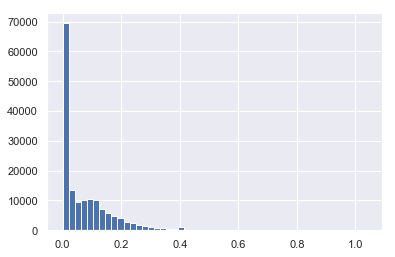

In [67]:
plt.hist( em_freq_np[:,5], bins=50 )
plt.show()

### Preparing Data for Plotting Time Series
1. Subsetting original set to only include timestamp and tweet text
2. Concatenating With Data Frame containing time data

In [68]:
tweet_time = (tweets_english[['tweet_text', 'tweet_time']]).reset_index(drop = True)


In [69]:
tweet_time.head(3), tweet_time.shape

(                                          tweet_text          tweet_time
 0  ashley madison stats find new orleans among th... 2015-08-21 22:30:00
 1                                  httptcon1xwcjhpr8 2015-04-13 18:04:00
 2  @nytimesworld two face scumbag listen up obama... 2017-01-13 03:17:00,
 (159272, 2))

In [70]:
emotions_frequencies = pd.concat([tweet_time, em_freq_df], axis = 1)
emotions_frequencies.head()


,tweet_text,tweet_time,disgust,surprise,neutral,anger,sad,happy,fear
0,ashley madison stats find new orleans among th...,2015-08-21 22:30:00,0.097226,0.271829,0.098647,0.144845,0.236115,0.097226,0.113099
1,httptcon1xwcjhpr8,2015-04-13 18:04:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,@nytimesworld two face scumbag listen up obama...,2017-01-13 03:17:00,0.061261,0.114266,0.058528,0.102166,0.111456,0.262198,0.154196
3,#inaugurationday #trumpinauguration #trumpismy...,2017-01-20 15:21:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,@michaelbarabaro fuckoff #losser #idiot #block...,2016-05-18 23:15:00,0.012034,0.067158,0.012034,0.078804,0.073370,0.029891,0.072593


### Plotting Emotion Detection Time Series

### Disgust

In [71]:
disgust= emotions_frequencies[['tweet_time', 'disgust' ]]
disgust.head(2)

,tweet_time,disgust
0,2015-08-21 22:30:00,0.097226
1,2015-04-13 18:04:00,0.000000


In [72]:
surprise= emotions_frequencies[['tweet_time', 'surprise' ]]
surprise.head(2)

,tweet_time,surprise
0,2015-08-21 22:30:00,0.271829
1,2015-04-13 18:04:00,0.000000


In [73]:
neutral= emotions_frequencies[['tweet_time', 'neutral' ]]
neutral.head(2)

,tweet_time,neutral
0,2015-08-21 22:30:00,0.098647
1,2015-04-13 18:04:00,0.000000


In [74]:
anger= emotions_frequencies[['tweet_time', 'anger' ]]
anger.head(2)


,tweet_time,anger
0,2015-08-21 22:30:00,0.144845
1,2015-04-13 18:04:00,0.000000


In [75]:
sad= emotions_frequencies[['tweet_time', 'sad' ]]
sad.head(2)

,tweet_time,sad
0,2015-08-21 22:30:00,0.236115
1,2015-04-13 18:04:00,0.000000


In [76]:
happy= emotions_frequencies[['tweet_time', 'happy' ]]
happy.head(2)

,tweet_time,happy
0,2015-08-21 22:30:00,0.097226
1,2015-04-13 18:04:00,0.000000


In [77]:
fear= emotions_frequencies[['tweet_time', 'fear' ]]
fear.head(2)

,tweet_time,fear
0,2015-08-21 22:30:00,0.113099
1,2015-04-13 18:04:00,0.000000


In [78]:
disgust_time = pd.DataFrame(pd.to_datetime( disgust["tweet_time"] ))
disgust_time['disgust'] = disgust['disgust']
disgust_time.set_index("tweet_time", inplace = True)
disgust_time.head(2)

,disgust
tweet_time,
2015-08-21 22:30:00,0.097226
2015-04-13 18:04:00,0.000000


In [79]:
surprise_time = pd.DataFrame(pd.to_datetime( surprise["tweet_time"] ))
surprise_time['surprise'] = surprise['surprise']
surprise_time.set_index("tweet_time", inplace = True)
surprise_time.head(2)

,surprise
tweet_time,
2015-08-21 22:30:00,0.271829
2015-04-13 18:04:00,0.000000


In [80]:
neutral_time = pd.DataFrame(pd.to_datetime( neutral["tweet_time"] ))
neutral_time['neutral'] = neutral['neutral']
neutral_time.set_index("tweet_time", inplace = True)
neutral_time.head(2)

,neutral
tweet_time,
2015-08-21 22:30:00,0.098647
2015-04-13 18:04:00,0.000000


In [81]:
anger_time = pd.DataFrame(pd.to_datetime( anger["tweet_time"] ))
anger_time['anger'] = anger['anger']
anger_time.set_index("tweet_time", inplace = True)
anger_time.head(2)


,anger
tweet_time,
2015-08-21 22:30:00,0.144845
2015-04-13 18:04:00,0.000000


In [82]:
sad_time = pd.DataFrame(pd.to_datetime( sad["tweet_time"] ))
sad_time['sad'] = sad['sad']
sad_time.set_index("tweet_time", inplace = True)
sad_time.head(2)

,sad
tweet_time,
2015-08-21 22:30:00,0.236115
2015-04-13 18:04:00,0.000000


In [83]:
happy_time = pd.DataFrame(pd.to_datetime( happy["tweet_time"] ))
happy_time['happy'] = happy['happy']
happy_time.set_index("tweet_time", inplace = True)
happy_time.head(2)

,happy
tweet_time,
2015-08-21 22:30:00,0.097226
2015-04-13 18:04:00,0.000000


In [84]:
fear_time = pd.DataFrame(pd.to_datetime( fear["tweet_time"] ))
fear_time['fear'] = fear['fear']
fear_time.set_index("tweet_time", inplace = True)
fear_time.head(2)

,fear
tweet_time,
2015-08-21 22:30:00,0.113099
2015-04-13 18:04:00,0.000000


### Monthly Emotions Detection. Cumulative. 

In [85]:

monthly_disgust = disgust_time['disgust'].resample('M').sum()

monthly_surprise = surprise_time['surprise'].resample('M').sum()

monthly_neutral = neutral_time['neutral'].resample('M').sum()

monthly_anger = anger_time['anger'].resample('M').sum()

monthly_sad = sad_time['sad'].resample('M').sum()

monthly_happy = happy_time['happy'].resample('M').sum()

monthly_fear = fear_time['fear'].resample('M').sum()


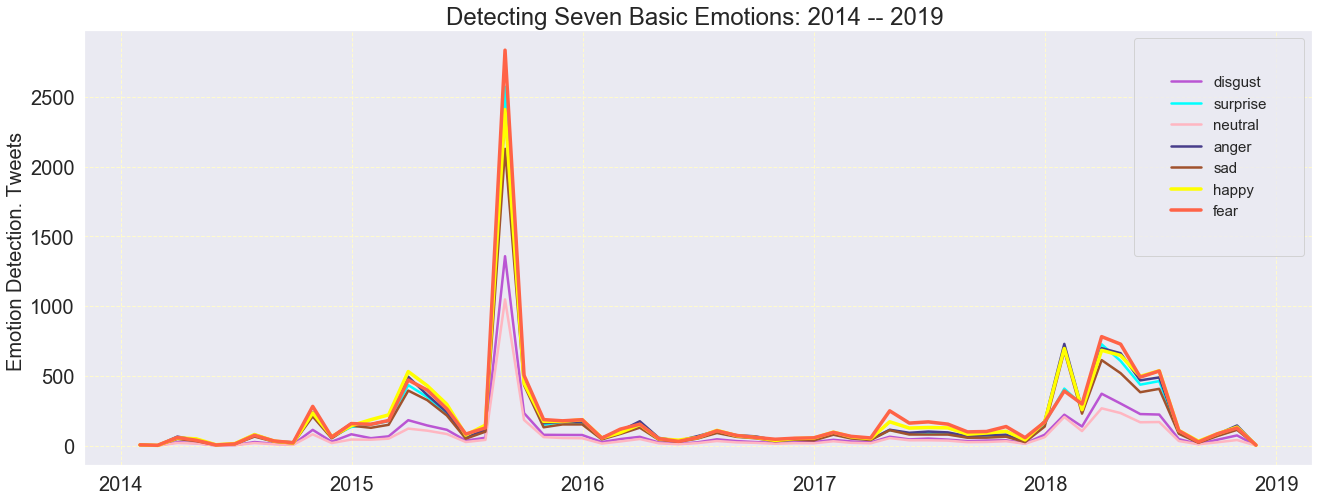

<Figure size 432x288 with 0 Axes>

In [88]:
plt.figure(figsize=(22,8))
sns.set(style="darkgrid")
plt.plot(monthly_disgust,  c = 'mediumorchid', linewidth=2.5, label = 'disgust')

plt.plot(monthly_surprise,  c = 'cyan', linewidth=2.5, label = 'surprise')
plt.plot(monthly_neutral,  c = 'lightpink', linewidth=2.5, label = 'neutral')
plt.plot(monthly_anger,  c = 'darkslateblue', linewidth=2.5, label = 'anger')
plt.plot(monthly_sad,  c = 'sienna', linewidth=2.5, label = 'sad')
plt.plot(monthly_happy,  c = 'yellow', linewidth=3.5, label = 'happy')
plt.plot(monthly_fear,  c = 'tomato', linewidth=3.5, label = 'fear')

plt.legend(borderpad=2.5, fontsize = 15, loc='upper right')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Emotion Detection. Tweets ', fontsize = 20)
plt.grid(c = 'lemonchiffon', linestyle = '--')
plt.title('Detecting Seven Basic Emotions: 2014 -- 2019 ', fontsize = 24)

plt.show()
plt.savefig('plots/monthly_tweet_volume.png')
# Emotional Composition of Tweets. 

### SAME BUT WITH THE SAME COLORS AS PIE CHART


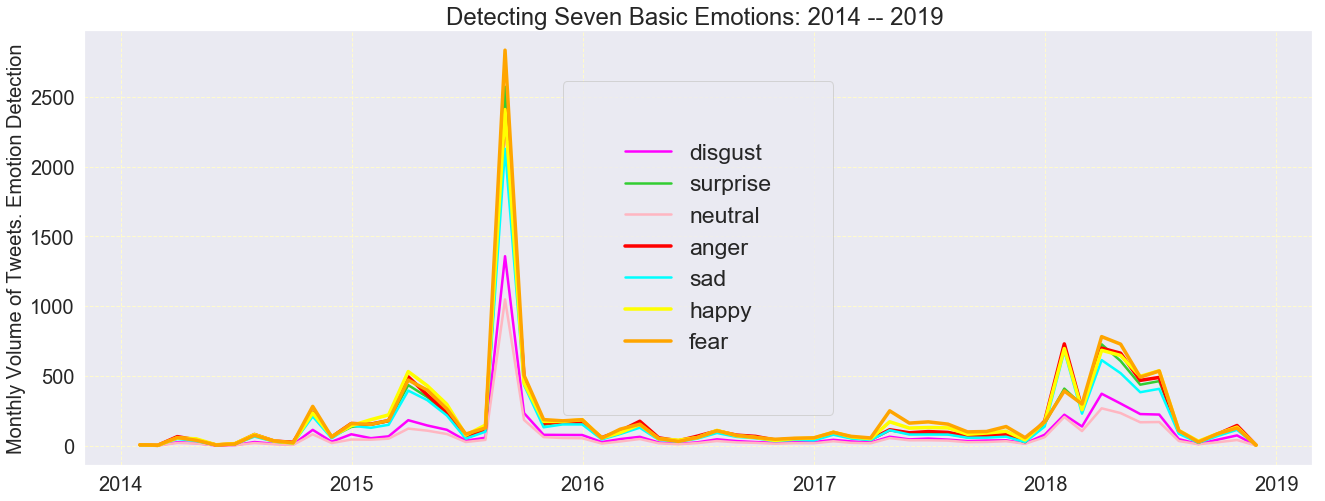

In [91]:
# ['Fuchsia', 'limegreen', 'lightpink', 'red', 'cyan', 'yellow', 'orange' ] 
plt.figure(figsize=(22,8))
sns.set(style="darkgrid")
plt.plot(monthly_disgust,  c = 'Fuchsia', linewidth=2.5, label = 'disgust')

plt.plot(monthly_surprise,  c = 'limegreen', linewidth=2.5, label = 'surprise')
plt.plot(monthly_neutral,  c = 'lightpink', linewidth=2.5, label = 'neutral')
plt.plot(monthly_anger,  c = 'red', linewidth=3.5, label = 'anger')
plt.plot(monthly_sad,  c = 'cyan', linewidth=2.5, label = 'sad')
plt.plot(monthly_happy,  c = 'yellow', linewidth=3.5, label = 'happy')
plt.plot(monthly_fear,  c = 'orange', linewidth=3.5, label = 'fear')

plt.legend(borderpad=2.7, fontsize = 23, loc='center')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Monthly Volume of Tweets. Emotion Detection', fontsize = 20)
plt.grid(c = 'lemonchiffon', linestyle = '--')
plt.title('Detecting Seven Basic Emotions: 2014 -- 2019 ', fontsize = 24)

plt.show()
# plt.savefig('plots/monthly_tweet_volume.png')
# Emotional Composition of Tweets. 

In [195]:
norm_monthly_disgust = disgust_time['disgust'].resample('M').sum()/monthly

norm_monthly_surprise = surprise_time['surprise'].resample('M').sum()/monthly

norm_monthly_neutral = neutral_time['neutral'].resample('M').sum()/monthly

norm_monthly_anger = anger_time['anger'].resample('M').sum()/monthly

norm_monthly_sad = sad_time['sad'].resample('M').sum()/monthly

norm_monthly_happy = happy_time['happy'].resample('M').sum()/monthly

norm_monthly_fear = fear_time['fear'].resample('M').sum()/monthly


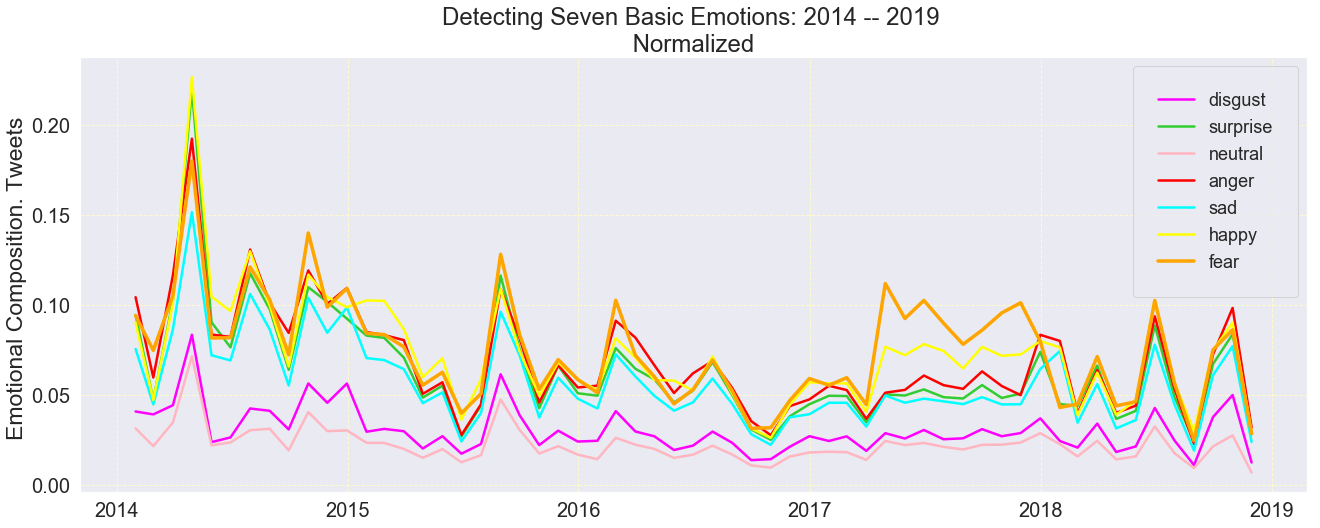

In [206]:
['Fuchsia', 'limegreen', 'lightpink', 'red', 'cyan', 'yellow', 'orange' ] 

plt.figure(figsize=(22,8))
sns.set(style="darkgrid")
plt.plot(norm_monthly_disgust,  c = 'Fuchsia', linewidth=2.5, label = 'disgust')

plt.plot(norm_monthly_surprise,  c = 'limegreen', linewidth=2.5, label = 'surprise')
plt.plot(norm_monthly_neutral,  c = 'lightpink', linewidth=2.5, label = 'neutral')
plt.plot(norm_monthly_anger,  c = 'red', linewidth=2.5, label = 'anger')
plt.plot(norm_monthly_sad,  c = 'cyan', linewidth=2.5, label = 'sad')
plt.plot(norm_monthly_happy,  c = 'yellow', linewidth=2.5, label = 'happy')
plt.plot(norm_monthly_fear,  c = 'orange', linewidth=3.5, label = 'fear')


plt.legend(borderpad=1.4, fontsize = 18, loc='upper right')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Emotional Composition. Tweets ', fontsize = 23)
plt.grid(c = 'lemonchiffon', linestyle = '--')
plt.title('Detecting Seven Basic Emotions: 2014 -- 2019 \n Normalized ', fontsize = 24)
plt.savefig('plots/norm_monthly_tweet_volume.png')

plt.show()

ValueError: need at least one array to concatenate

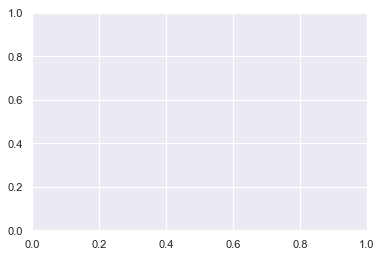

In [81]:


norm_month = [norm_monthly_disgust, norm_monthly_surprise, norm_monthly_neutral, norm_monthly_anger,
             norm_monthly_sad, norm_monthly_happy, norm_monthly_fear ]


x = [disgust_time.index, surprise_time.index, neutral_time.index, anger_time.index, sad_time.index, happy_time.index, fear_time.index]

plt.stackplot(x,y = norm_month, labels=['A','B','C', 'd', 'e', 'f', 'g'])

plt.figure(figsize=(22,8))
# sns.set(style="darkgrid")
# plt.plot(norm_monthly_disgust,  c = 'mediumorchid', linewidth=2.5, label = 'disgust')

# plt.plot(norm_monthly_surprise,  c = 'cyan', linewidth=2.5, label = 'surprise')
# plt.plot(norm_monthly_neutral,  c = 'lightpink', linewidth=2.5, label = 'neutral')
# plt.plot(norm_monthly_anger,  c = 'darkslateblue', linewidth=2.5, label = 'anger')
# plt.plot(norm_monthly_sad,  c = 'sienna', linewidth=2.5, label = 'sad')
# plt.plot(norm_monthly_happy,  c = 'yellow', linewidth=2.5, label = 'happy')
# plt.plot(norm_monthly_fear,  c = 'tomato', linewidth=2.5, label = 'fear')


# plt.legend(borderpad=2.5, fontsize = 15, loc='upper center')
# plt.xticks(fontsize = 20)
# plt.yticks(fontsize = 20)
# plt.ylabel('Cumulative Emotion Detection. Tweets ', fontsize = 20)
# plt.grid(c = 'lemonchiffon', linestyle = '--')
# plt.title('Detecting Seven Basic Emotions: 2014 -- 2019 \n Normalized ', fontsize = 24)
# # plt.savefig('plots/norm_monthly_tweet_volume.png')

# plt.show()

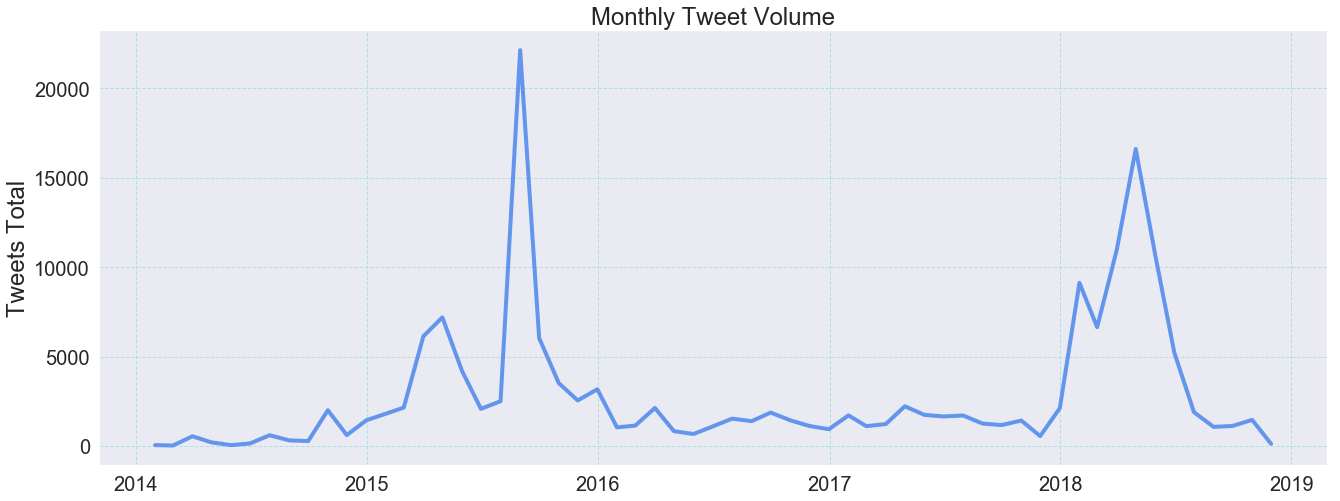

In [71]:
plt.figure(figsize=(22,8))

plt.plot(monthly,  c = 'cornflowerblue', linewidth=4.0)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Tweets Total', fontsize = 24)
plt.title('Monthly Tweet Volume', fontsize = 24)
plt.grid(c = 'powderblue', linestyle = '--')

plt.savefig('plots/tweet_volume.png')
plt.show()

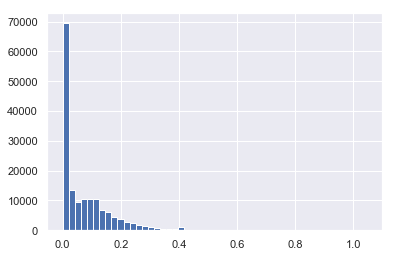

In [97]:
plt.hist( em_freq_np[:,5], bins=50 )
plt.show()

In [98]:
em_freq_np.shape
#percentege of emotion associated with tweet

(159272, 7)

In [99]:
import seaborn as sns

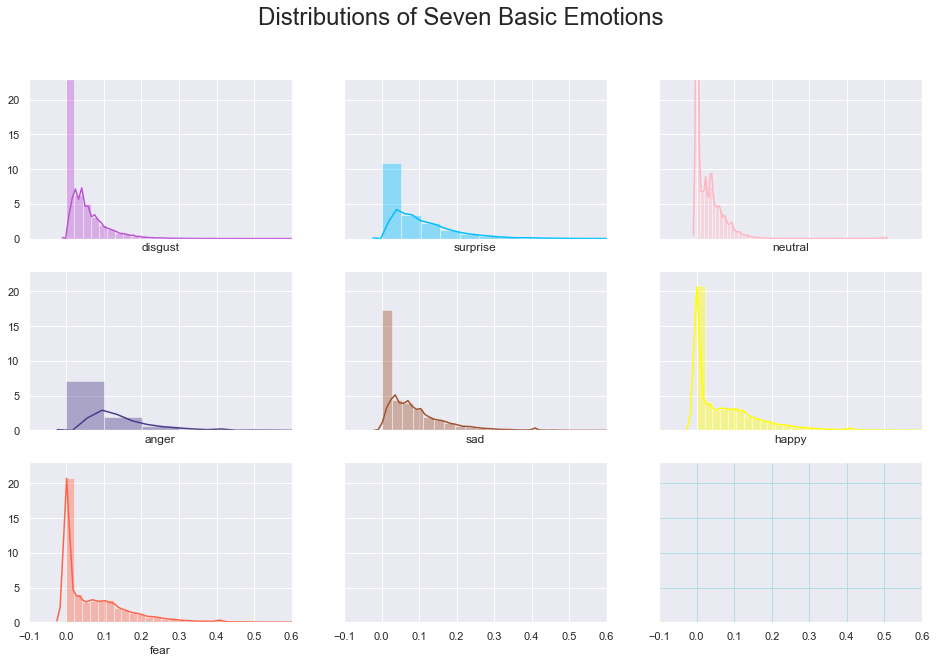

In [100]:
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(16,10), sharex=True, sharey=True)
fig.suptitle('Distributions of Seven Basic Emotions', fontsize = 24)


sns.set()


sns.distplot(em_freq_np[:,0], ax = axs[0, 0], bins = 50, axlabel = 'disgust', color='mediumorchid') 
sns.distplot(em_freq_np[:,1], ax = axs[0, 1], bins = 50, axlabel = 'surprise', color='deepskyblue')
sns.distplot(em_freq_np[:,2], ax = axs[0, 2], bins = 50, axlabel = 'neutral', color = 'lightpink')
sns.distplot(em_freq_np[:,3], ax = axs[1, 0], bins = 50, axlabel = 'anger', color = 'darkslateblue')
sns.distplot(em_freq_np[:,4], ax = axs[1, 1], bins = 50, axlabel = 'sad', color = 'sienna')
sns.distplot(em_freq_np[:,5], ax = axs[1, 2], bins = 50, axlabel = 'happy', color = 'yellow')
sns.distplot(em_freq_np[:,5], ax = axs[2, 0], bins = 50, axlabel = 'fear', color = 'tomato')


plt.grid(c = 'powderblue')
plt.ylim(0, 23)
plt.xlim(-0.1, 0.6)



plt.show()



#